# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jason Tjoa
- **Email:** tjoajason2003@gmail.com
- **ID Dicoding:** jason_tjoa_ty9h

## Menentukan Pertanyaan Bisnis

- Apakah terdapat jam tertentu dalam satu hari saat penyewaan sepeda mencapai puncaknya?
- Bagaimana suhu, kelembapan, dan kecepatan angin berkorelasi dengan jumlah penyewaan sepeda?
- Bagaimana tren keseluruhan penyewaan sepeda dalam periode dua tahun tersebut?

## Import Semua Packages/Library yang Digunakan

Library pandas ("import pandas as pd"): Untuk membaca, membersihkan, dan menganalisis data.

Library matplotlib ("import matplotlib.pylot as plt"): Untuk membuat visualisasi data seperti bar chart dan line plot.

Library seaborn ("import seaborn as sns"): Untuk membuat visualisasi data seperti heatmap.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Pemanggilan data dari link github yang berisi database "day.csv" dan "hour.csv".

In [2]:
day_df = pd.read_csv("https://raw.githubusercontent.com/jasontjoa1/tes1/main/day.csv")
hour_df = pd.read_csv("https://raw.githubusercontent.com/jasontjoa1/tes1/main/hour.csv")

Pembacaan lima data awal yang tersimpan di dalam "day_df".

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Pembacaan lima data awal yang tersimpan di dalam "hour_df".

In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Pembacaan semua tipe data dari setiap variabel di dalam "day_df".

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pembacaan semua tipe data dari setiap variabel di dalam "hour_df".

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pemeriksaan apakah terdapat data duplikat di dalam "day_df".

In [7]:
print("Jumlah duplikasi dalam database day: ", day_df.duplicated().sum())

Jumlah duplikasi dalam database day:  0


Pemeriksaan apakah terdapat data duplikat di dalam "hour_df".

In [8]:
print("Jumlah duplikasi dalam database hour: ", hour_df.duplicated().sum())

Jumlah duplikasi dalam database hour:  0


Pemeriksaan apakah terdapat data kosong di dalam "day_df".

In [9]:
print("Jumlah data hilang dalam database day:\n", day_df.isna().sum())

Jumlah data hilang dalam database day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Pemeriksaan apakah terdapat data kosong di dalam "hour_df".

In [10]:
print("Jumlah data hilang dalam database hour:\n", hour_df.isna().sum())

Jumlah data hilang dalam database hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Pemeriksaan statistik "day_df" untuk memastikan ketepatan data.

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Pemeriksaan statistik "hour_df" untuk memastikan ketepatan data.

In [12]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

Meskipun sebelumnya dinyatakan tidak ada data duplikat, namun untuk berjaga-jaga dilakukan pembuangan data duplikat dari dalam "day_df" dan menampilkan kembali jumlah data duplikat dari dalam "day_df".

In [13]:
day_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi dalam database day: ", day_df.duplicated().sum())

Jumlah duplikasi dalam database day:  0


Meskipun sebelumnya dinyatakan tidak ada data duplikat, namun untuk berjaga-jaga dilakukan pembuangan data duplikat dari dalam "hour_df" dan menampilkan kembali jumlah data duplikat dari dalam "hour_df".

In [14]:
hour_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi dalam database hour: ", hour_df.duplicated().sum())

Jumlah duplikasi dalam database hour:  0


Meskipun sebelumnya dinyatakan tidak ada data hilang, namun untuk berjaga-jaga dilakukan pengisian value 0 jika ada data hilang di dalam "day_df" dan menampilkan kembali jumlah data hilang dari dalam "day_df".

In [15]:
day_df.fillna(value=0, inplace=True)
print("Jumlah data hilang dalam database day:\n", day_df.isna().sum())

Jumlah data hilang dalam database day:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Meskipun sebelumnya dinyatakan tidak ada data hilang, namun untuk berjaga-jaga dilakukan pengisian value 0 jika ada data hilang di dalam "hour_df" dan menampilkan kembali jumlah data hilang dari dalam "hour_df".

In [16]:
hour_df.fillna(value=0, inplace=True)
print("Jumlah data hilang dalam database hour:\n", hour_df.isna().sum())

Jumlah data hilang dalam database hour:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dilakukan pengubahan tipe data pada "season", "weekday", "workingday", dan "weathersit" karena keempat variabel tersebut merupakan penampung pilihan atau kategori yang memiliki batasan.

Dilakukan pengubahan tipe data pada "dteday" karena variabel tersebut merupakan penampung tanggal.

In [17]:
categorical_columns = ['season', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    day_df[col] = day_df[col].astype('category')
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

Dilakukan pengubahan tipe data pada "season", "weekday", "workingday", dan "weathersit" karena keempat variabel tersebut merupakan penampung pilihan atau kategori yang memiliki batasan.

Dilakukan pengubahan tipe data pada "dteday" karena variabel tersebut merupakan penampung tanggal.

In [18]:
categorical_columns = ['season', 'weekday', 'workingday', 'weathersit']

for col in categorical_columns:
    hour_df[col] = hour_df[col].astype('category')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

Pemanggilan 5 sampel data dari dalam "day_df".

In [19]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
93,94,2011-04-04,2,0,4,0,1,1,1,0.573333,0.542929,0.426250,0.385571,734,2381,3115
94,95,2011-04-05,2,0,4,0,2,1,2,0.414167,0.398350,0.642083,0.388067,167,1628,1795
658,659,2012-10-20,4,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090
558,559,2012-07-12,3,1,7,0,4,1,1,0.715833,0.654683,0.529583,0.146775,1032,6414,7446
298,299,2011-10-26,4,0,10,0,3,1,2,0.484167,0.472846,0.720417,0.148642,404,3490,3894


Pengeksplorasian jumlah penyewa sepeda baik "casual" dan "registered" pada setiap harinya.

In [24]:
daily_rentals_summary = day_df.groupby('weekday').agg({
    'cnt': 'sum',
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='cnt', ascending=False)

print("\nDaily Rentals Summary:")
print(daily_rentals_summary)


Daily Rentals Summary:
            cnt  casual  registered
weekday                            
5        487790   78238      409552
4        485395   61460      423935
6        477807  153852      323955
3        473048   57319      415729
2        469109   57843      411266
1        455503   70784      384719
0        444027  140521      303506


Pemanggilan 5 sampel data dari dalam "hour_df".

In [25]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
642,643,2011-01-30,1,0,1,1,0,0,0,1,0.14,0.2121,0.80,0.0000,7,22,29
3243,3244,2011-05-20,2,0,5,1,0,5,1,1,0.46,0.4545,1.00,0.0000,8,17,25
3788,3789,2011-06-11,2,0,6,18,0,6,0,2,0.72,0.6818,0.62,0.1343,131,155,286
12319,12320,2012-06-02,2,1,6,12,0,6,0,1,0.62,0.6212,0.43,0.3582,250,418,668
9499,9500,2012-02-05,1,1,2,17,0,0,0,1,0.32,0.3182,0.53,0.1642,31,275,306


Pengeksplorasian jumlah penyewa sepeda berdasarkan jam untuk menyatakan waktu jam dengan penyewa sepeda terbanyak.

In [26]:
hourly_peak_hours = hour_df.groupby('hr')['cnt'].sum().sort_values(ascending=True)

print("Hourly Rentals Peak Hours:")
print(hourly_peak_hours)

Hourly Rentals Peak Hours:
hr
4       4428
3       8174
5      14261
2      16352
1      24164
0      39130
6      55132
23     63941
22     95612
21    125445
10    126257
11    151320
7     154171
9     159438
20    164550
14    175652
15    183149
12    184414
13    184919
19    226789
16    227748
8     261001
18    309772
17    336860
Name: cnt, dtype: int64


Pengeksplorasian korelasi suhu, kelembapan, dan kecepatan angin dengan jumlah penyewa sepeda.

In [27]:
weather_correlation = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

print("Correlation Matrix for Hourly Data:")
print(weather_correlation)

Correlation Matrix for Hourly Data:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


Pengeksplorasian tren penyewaan sepeda dengan berdasarkan jumlah penyewa setiap bulannya dalam periode dua tahun tersebut.

In [28]:
monthly_rentals_df = day_df.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
print(monthly_rentals_df)

               cnt
dteday            
2011-01-31   38189
2011-02-28   48215
2011-03-31   64045
2011-04-30   94870
2011-05-31  135821
2011-06-30  143512
2011-07-31  141341
2011-08-31  136691
2011-09-30  127418
2011-10-31  123511
2011-11-30  102167
2011-12-31   87323
2012-01-31   96744
2012-02-29  103137
2012-03-31  164875
2012-04-30  174224
2012-05-31  195865
2012-06-30  202830
2012-07-31  203607
2012-08-31  214503
2012-09-30  218573
2012-10-31  198841
2012-11-30  152664
2012-12-31  123713


## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat jam tertentu dalam satu hari saat penyewaan sepeda mencapai puncaknya?

Visualisasi jumlah penyewa setiap jamnya dengan bar *chart*.

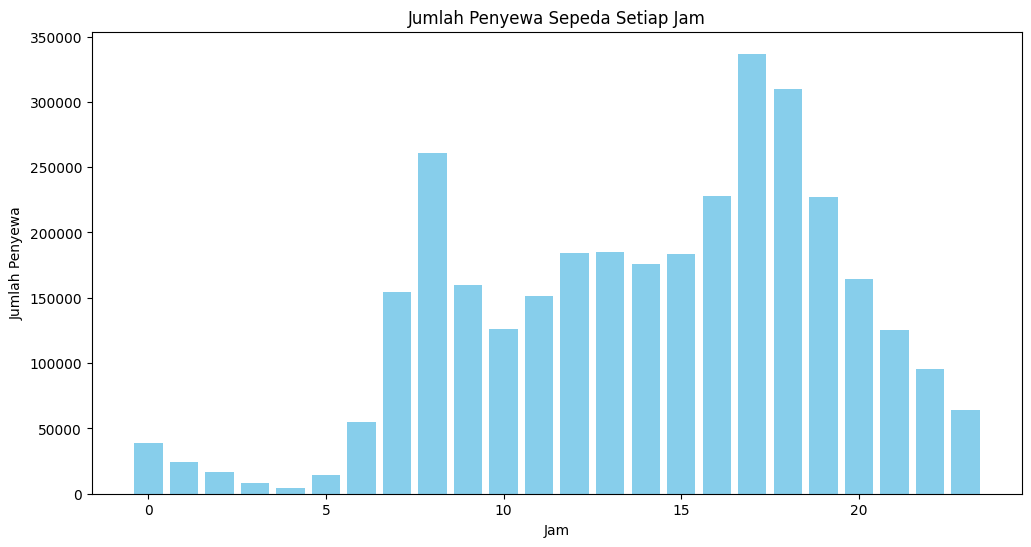

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(hourly_peak_hours.index, hourly_peak_hours.values, color='skyblue')
plt.title('Jumlah Penyewa Sepeda Setiap Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewa')
plt.show()

### Pertanyaan 2: Bagaimana suhu, kelembapan, dan kecepatan angin berkorelasi dengan jumlah penyewaan sepeda?



Visualisasi korelasi suhu, kelembapan, dan kecepatan angin dengan jumlah penyewaan sepeda dengan heatmap.

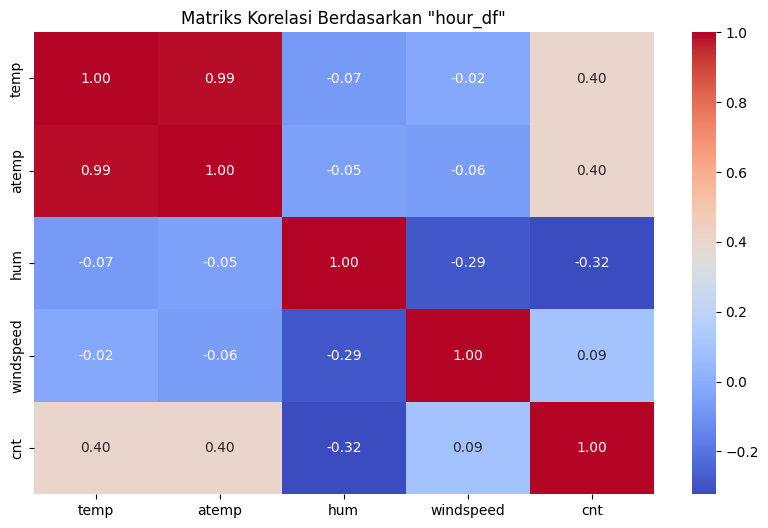

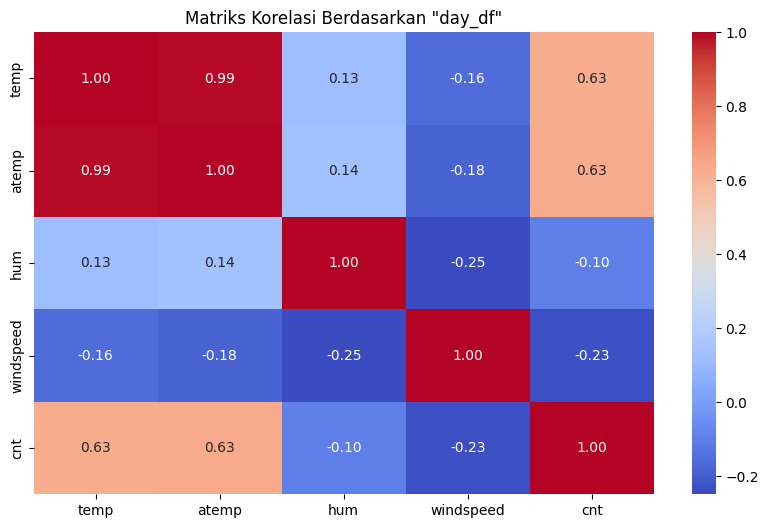

In [30]:
hourly_correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(hourly_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Berdasarkan "hour_df"')
plt.show()

daily_correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(daily_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Berdasarkan "day_df"')
plt.show()

### Pertanyaan 3: Bagaimana tren keseluruhan penyewaan sepeda dalam periode dua tahun tersebut?

Visualisasi total penyewa sepeda setiap bulannya dengan line plot.

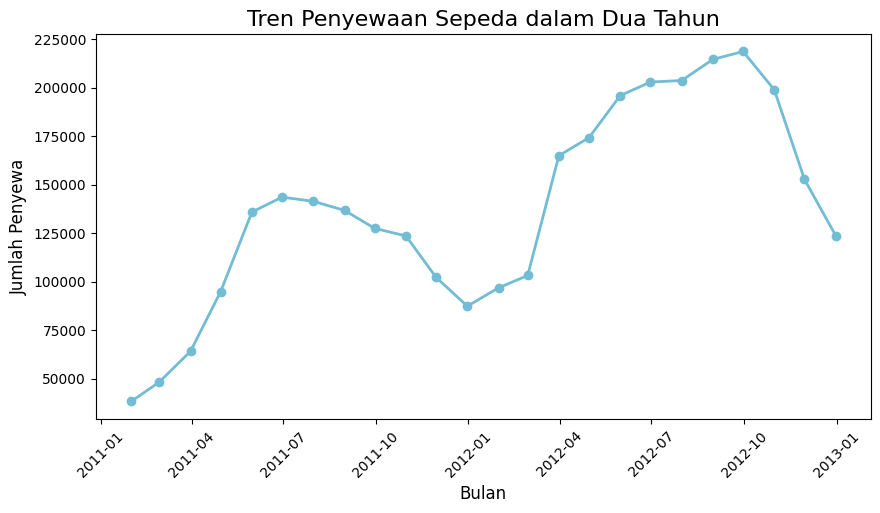

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_df.index, monthly_rentals_df['cnt'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Tren Penyewaan Sepeda dalam Dua Tahun", loc="center", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penyewa", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

1. Berdasarkan bar chart yang dihasilkan, tampak bahwa jumlah penyewa sepeda mencapai puncaknya pada jam 17 atau 5 sore.
2. Berdasarkan kedua heatmap yang dihasilkan, tampak bahwa suhu, kelembapan, dan kecepatan angin mempengaruhi jumlah penyewa sepeda dimana saat suhu naik dan kelembapan serta kecepatan angin turun maka jumlah penyewa sepeda akan meningkat.
3. Berdasarkan line plot yang dihasilkan, tampak bahwa tren penyewaan sepeda memuncak pada bulan 10 tahun 2012 dan mengalami penurunan terbawah pada bulan 1 tahun 2012 sejak dimulainya pada bulan 1 tahun 2011.